<h1><strong>UNIVERSIDAD POLITECNICA DE YUCATAN</strong></h1>
<h2>Data Engineering  -  A8</h2>
<h2>Adrian Roberto Carmona Rodriguez</h2>


## Introduction (Extracted from the original source)

League of Legends (LoL) is one of the most popular free to play MOBA (Multiplayer Online Battle Arena) games, it was published by Riot Games in 2009, and had in 2016 (according to www.statista.com) about 10 million active players, it is usually in the top ranks of viewers in platforms like Twitch.tv and gaming.youtube.com.

The game is composed by two teams, of five players each, who battle each other to destroy the opposing team´s base. Every player controls a champion which is selected from a pool of 141 champions. These champions have unique abilities, stats, and playstyles which group them in classes and subclasses.

Riot also created the Universe of League of Legends, that contains the history, images, songs, videos, etc. of the planet RuneTerra (where the game takes place), and of the champions and character that live and interact with it.

Through this document, we’ll make a brief analysis of the “Social” Network of the RuneTerra’s Champions. For this, we will create a Network based on the relations between the Champions.

To determine if two champions are connected we’ll take for reference the LoL Universe web page, in which each champion have a list of their “officially” related champions. Also, we’ll use the relations between Champions showed in each of Champion’s Wikia background web pages since the Wikia take in consideration connections from the Universe comics, short histories, etc. that for an unknown reason, are not yet listed in the Universe web page. For example, in the comic “Ziggs & Jinx: Paint the Town” we can see a relation for this two Champions, this relation it is listed on the Wikia page but not on the Universe page.

Ref: https://cave80.github.io/LoL_Universe_Network/

## Description

My source of visualization was this page designed by a lol lover who decided to analyze the League of Lengends universe, the problem is that he didn't share his data set and he didn't share his riotgames key, so I decided to create the dataset in a txt by hand and design this network. https://cave80.github.io/LoL_Universe_Network/.

The language used in the post is R, so I did it in python with my hand made txt of the region and connections. For my visualization I used the documentation from: https://pyvis.readthedocs.io/en/latest/_modules/pyvis/network.html.

In [1]:
 %%capture
#commands to install necessary things
!pip install pyvis
!pip install igraph
!pip install python-igraph 
!apt-get install libcairo2-dev libjpeg-dev libgif-dev
!pip install pycairo

#libraries
import networkx as nx 
from pyvis.network import Network
import cairo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import igraph as ig
import seaborn as sns
from IPython.display import SVG, display, Image
import os
os.system("clear")

In [2]:
def add_nodes(archivo,G):
    with open("campeones.txt") as archivo:
        for linea in archivo:
            if ':' in linea:
                #agarramos el champeon
                champ = linea[:linea.index(':')].replace(':','').replace('\n','')
                G.add_node(champ)

            else:
                #agarramos campeones sin conexion
                champ = linea.replace(':','').replace('\n','')
                G.add_node(champ)

                
    return G

def make_links(archivo,G):
    with open("campeones.txt") as archivo:
        for linea in archivo:

            if ':' in linea:
                #agarramos el champeon
                champ = linea[:linea.index(':')].replace(':','').replace('\n','')
                relaciones = linea[linea.index(':'):].replace(':','').replace('\n','').split(',')
                for relacion in relaciones:
                    G.add_edge(champ, relacion)
                    G.add_edge(relacion, champ)
                #print(champ, relaciones)
            else:
                continue
    return G

def tag_colors(archivo,colors_champs):
    colors = ["#CCCCCC","#00CC99","#FFFF00","#33CCFF","#CCFF99","#FF9933","#FFCC99", "#FF3300", "#FF3399", "#FF99CC", "#FF3333","#99FFFF", "#9933FF"]
    count = 0
    with open("regiones.txt") as archivo:
        for linea in archivo:
            champs = linea[linea.index(':'):].replace(':','').replace('\n','').split(',')
            for champ in champs:
                index = colors_champs.index(champ)
                colors_champs[index] = colors[count]
            count = count + 1
    return colors_champs



def visualization(G,labels,colors,name):
    nt = Network('1500px', '2000px',bgcolor='#222222', font_color='white',heading="League of Legends - Universe Network")
    nt.add_nodes(list(range(0,len(labels))), 
                label=labels,
                color=colors)
    for edge in G.edges():
        nt.add_edge(labels.index(edge[0]),labels.index(edge[1]))
    #nt.show_buttons(filter_=['physics'])
    nt.save_graph(f'{name}.html')
    return

def delete_n(G,labels,colors,nodes_del):
    for champ in nodes_del:
        index = labels.index(champ)
        del labels[index]
        del colors[index]
        G.remove_node(champ)
    return G, labels, colors

In [3]:
G = nx.Graph() # crear un grafo
G = add_nodes(archivo = "campeones.txt",G = G) #funcion para anadir los nodos a la red
G = make_links(archivo = "campeones.txt",G = G) #funcion para anadir las relaciones
colors = tag_colors(archivo = "regiones.txt",colors_champs = sorted(G.nodes)) #funcion para mapear color de las regiones
labels = sorted(G.nodes) #funcion para extraer los labels de los campeones
visualization(G,labels,colors,'grafo_original') #funcion para visualizarlo

## Cleanning

As we can see, our network has some nodes that are not connected with nothing as `rammus` and others, by that reason we will delate those nodes that are not conected.
  

In [4]:
#eliminamos los nodos
nodes_del = ['rammus','amumu','annie','ivern','bard','zac','twitch']
G,labels,colors = delete_n(G,labels,colors,nodes_del)
visualization(G,labels,colors,'grafo_connected') #funcion para visualizarlo

Now we can made metrics because we dont have nodes that are not relevant as above, so is time to analyse the network.

## Network Characteristics and Degree Distribution

==== Basic information ====

Network size: 305
Number of nodes: 134
Number of edges: 305
Radius: 6
Diameter: 10
Eccentricity based in top 5: [('ahri', 10), ('tristana', 10), ('zyra', 10), ('nami', 10), ('teemo', 10)]
Center: ['warwick', 'camile', 'swain', 'ekko', 'urgot']
Periphery: ['ahri', 'tristana', 'zyra', 'nami', 'teemo', 'lulu', 'kled']
Density: 0.03422735944338458
Average Degree: 4.552238805970149




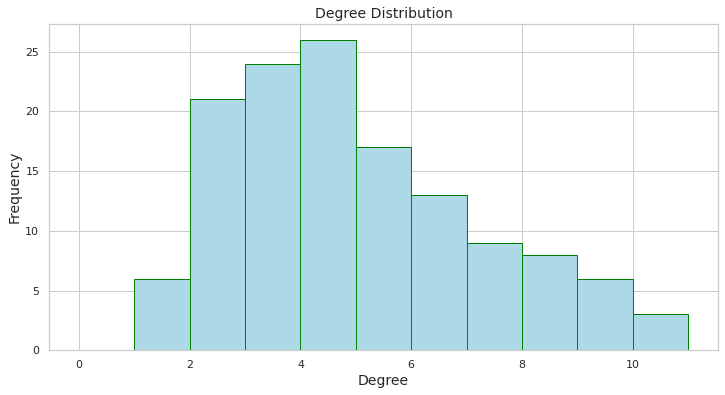

In [5]:
# Metrics  Functions
def basic_info(G):
    print("==== Basic information ====\n")
    print(f'Network size: {G.size()}')
    print(f'Number of nodes: {G.number_of_nodes()}')
    print(f'Number of edges: {G.number_of_edges()}')
    print(f"Radius: {nx.radius(G)}")
    print(f"Diameter: {nx.diameter(G)}")
    print(f"Eccentricity based in top 5: {sorted(nx.eccentricity(G).items(), key= lambda item:item[1], reverse = True)[0:5]}")
    print(f"Center: {nx.center(G)}")
    print(f"Periphery: {nx.periphery(G)}")
    print(f"Density: {nx.density(G)}")
    print(f"Average Degree: {np.mean([G.degree(n) for n in G.nodes()])}")
    print('\n')


def degree_dist(G):
    plt.figure(figsize=(12,6))
    sns.set_theme(style = 'whitegrid')
    
    #Degree per node
    degs = [G.degree(n) for n in G.nodes()]

    # Diagrama de distribución estadística de distribución de grados
    plt.hist(degs, bins=range(max(degs)) ,color = "lightblue", ec="green")
    plt.xlabel('Degree', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title('Degree Distribution', fontsize=14)

basic_info(G)
degree_dist(G)


## Centrality measures

In [6]:

def closeness_5(G):
    closeness = nx.closeness_centrality(G)
    closeness = sorted(closeness.items(), key= lambda item:item[1], reverse = True)
    print("Top 5 Closeness Centrality")
    for line in closeness[0:5]:
        print (': '.join(map(str, line)))
    print('\n')

def betweenness_5(G):
    betweenness = nx.betweenness_centrality(G)
    betweenness = sorted(betweenness.items(), key= lambda item:item[1], reverse = True)
    print("Top 5 Betweenness Centrality")
    for line in betweenness[0:5]:
        print (': '.join(map(str, line)))
    print('\n')

def eigen_5(G):
    eigen = nx.eigenvector_centrality(G)
    eigen = sorted(eigen.items(), key= lambda item:item[1], reverse = True)
    print("Top 5 Eigen Centrality")
    for line in eigen[0:5]:
        print (': '.join(map(str, line)))
    print('\n')

def katz_5(G):
    katz = nx.katz_centrality(G)
    katz = sorted(katz.items(), key= lambda item:item[1], reverse = True)
    print("Top 5 Katz Centrality")
    for line in katz[0:5]:
        print (': '.join(map(str, line)))
    print('\n')

def page_rank_5(G):
    page_r = nx.pagerank(G)
    page_r = sorted(page_r.items(), key= lambda item:item[1], reverse = True)
    print("Top 5 Page Rank")
    for line in page_r[0:5]:
        print (': '.join(map(str, line)))
    print('\n')

closeness_5(G)
betweenness_5(G)
eigen_5(G)
katz_5(G)
page_rank_5(G)

Top 5 Closeness Centrality
ryze: 0.30296127562642367
swain: 0.29954954954954954
urgot: 0.2982062780269058
nasus: 0.2891304347826087
jarvan iv: 0.2835820895522388


Top 5 Betweenness Centrality
ryze: 0.18391498126640807
swain: 0.16594514427169557
urgot: 0.13470916129197488
miss fortune: 0.11344660938400951
kayn: 0.10442158905991254


Top 5 Eigen Centrality
nasus: 0.39999221966375337
renekton: 0.3639229697757953
azir: 0.34884104310547903
xerath: 0.2813374132284678
sivir: 0.258058230659677


Top 5 Katz Centrality
nasus: 0.199296634349094
renekton: 0.17883984000496286
azir: 0.1686958785518876
aatrox: 0.15202775718035164
kayn: 0.14651437491978614


Top 5 Page Rank
swain: 0.014954840900225043
nasus: 0.014085627953226284
miss fortune: 0.013798487965606109
veigar: 0.013701263972633018
lissandra: 0.013025118750178716




## Looking for the 3 max cliques in the graph


CLIQQUE NUMERO : 0


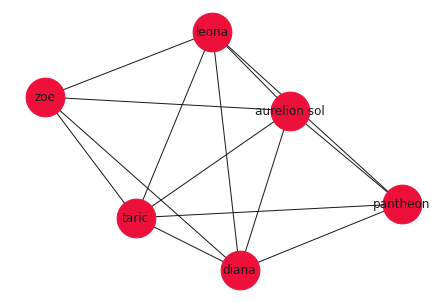

CLIQQUE NUMERO : 1


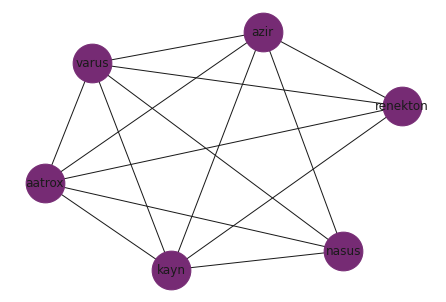

CLIQQUE NUMERO : 2


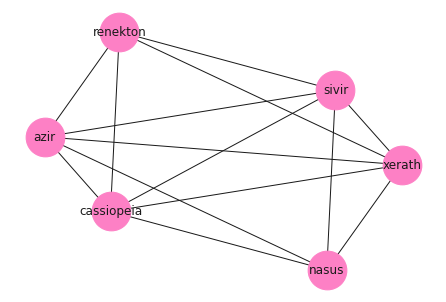

In [7]:
from itertools import combinations #para el grafo de clique asi hago que todos se conecten.
import random #para mis colores

def max_cliques(G, num):
    cliques = []
    for clique in nx.clique.find_cliques(G):
        cliques.append(clique)
        cliques_sorted = sorted(cliques, key = len)
    return cliques_sorted[(-1*num):]

def clique_graphs(G, cliques):
    graphs = []
    count = 0
    colors
    for clique in cliques:
        g = nx.Graph()
        g.add_nodes_from(clique)
        graphs.append(g)
        combs = combinations(clique, 2)
        for links in combs:
            print(f'CLIQQUE NUMERO : {count}')
            g = graphs[count]
            for i in combs:
                g.add_edge(i[0],i[1])
            count = count + 1
            nx.draw(g, node_size = 1500, node_color=["#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)])],with_labels=True)
            plt.show()
        
            
cliques = max_cliques(G, num = 3)
clique_graphs(G,cliques = cliques)

## Community detection usando Edge_Betweenness y Fast_Greedy

In [8]:
G_ig = ig.Graph.TupleList(G.edges(), directed=False)
dendograma_edge_betweenness = G_ig.community_edge_betweenness(clusters=None, directed=False, weights=None)
dendograma_fast_greedy = G_ig.community_fastgreedy(weights=None)
print('La partición con Modularidad optima tiene en total '+str(dendograma_fast_greedy.optimal_count)+' comunidades\n')
print(dendograma_fast_greedy.as_clustering())

La partición con Modularidad optima tiene en total 9 comunidades

Clustering with 134 elements and 9 clusters
[0] ahri, wukong, master yi, singed, dr mundo, warwick, viktor, camile,
    blitzcrank, ekko, orianna, jayce, vi, caitlyn, ezreal, janna, skarner,
    rek'sai, malphite, maokai, zyra
[1] riven, yasuo, taliyah, nasus, xerath, azir, sivir, cassiopeia, jax,
    renekton, varus
[2] irelia, syndra, karma, lee sin, xayah, rakan, kayn, zed, shen, jhin,
    akali, kennen
[3] vayne, leblanc, swain, urgot, sion, evelynn, vladimir, elise, jarvan iv,
    draven, darius, katarina, garen, lux, talon, galio, fiora, shyvana, xin
    zhao, quinn, nocturne, kayle, poppy, fiddlesticks, shaco, alistar, morgana
[4] soraka, mordekaiser, gankplank, karthus, kalista, hecarim, kindred, tahm
    kench, yorick, thresh, illaoi, miss fortune, lucian, graves, pyke, twisted
    fate, fizz, nautilus, olaf, nami
[5] jinx, ziggs, heimerdinger, rumble, veigar, corki, gnar, tristana, teemo,
    lulu, kled
[6] kas

## Community Detection with modularity using infomap

In [9]:
#ANALISIS DE COMUNIDADES CON MODULARITY (NO DEVUELVE DENDOGRAMAS)
particion_infomap_igraph = G_ig.community_infomap()
print(particion_infomap_igraph)

Clustering with 134 elements and 18 clusters
[ 0] ahri, wukong, master yi
[ 1] singed, dr mundo, warwick, riven, yasuo
[ 2] irelia, soraka, syndra, karma
[ 3] viktor, camile, blitzcrank, ekko, orianna, jayce, vi, caitlyn, ezreal,
     janna, jinx
[ 4] vayne, leblanc, swain, urgot, sion, vladimir, elise, draven, darius,
     katarina
[ 5] evelynn, kassadin, ryze, malzahar, kai'sa, sona
[ 6] mordekaiser, karthus, kalista, hecarim, kindred, yorick, thresh, lucian
[ 7] taliyah, nasus, xerath, azir, sivir, cassiopeia, kayn, aatrox, jax,
     renekton, brand, varus
[ 8] jarvan iv, garen, lux, talon, fiora, xin zhao, quinn, alistar
[ 9] gankplank, tahm kench, illaoi, miss fortune, graves, pyke, twisted fate,
     fizz, nautilus, nami
[10] lee sin, xayah, rakan, zed, shen, jhin, akali, kennen
[11] skarner, rek'sai, malphite, maokai, zyra
[12] zoe, taric, aurelion sol, leona, pantheon, diana
[13] udyr, sejuani, lissandra, trundle, olaf, volibear, anivia, tryndamere,
     ashe, ornn, nunu, braum

## Community Detection with Girvan and newman

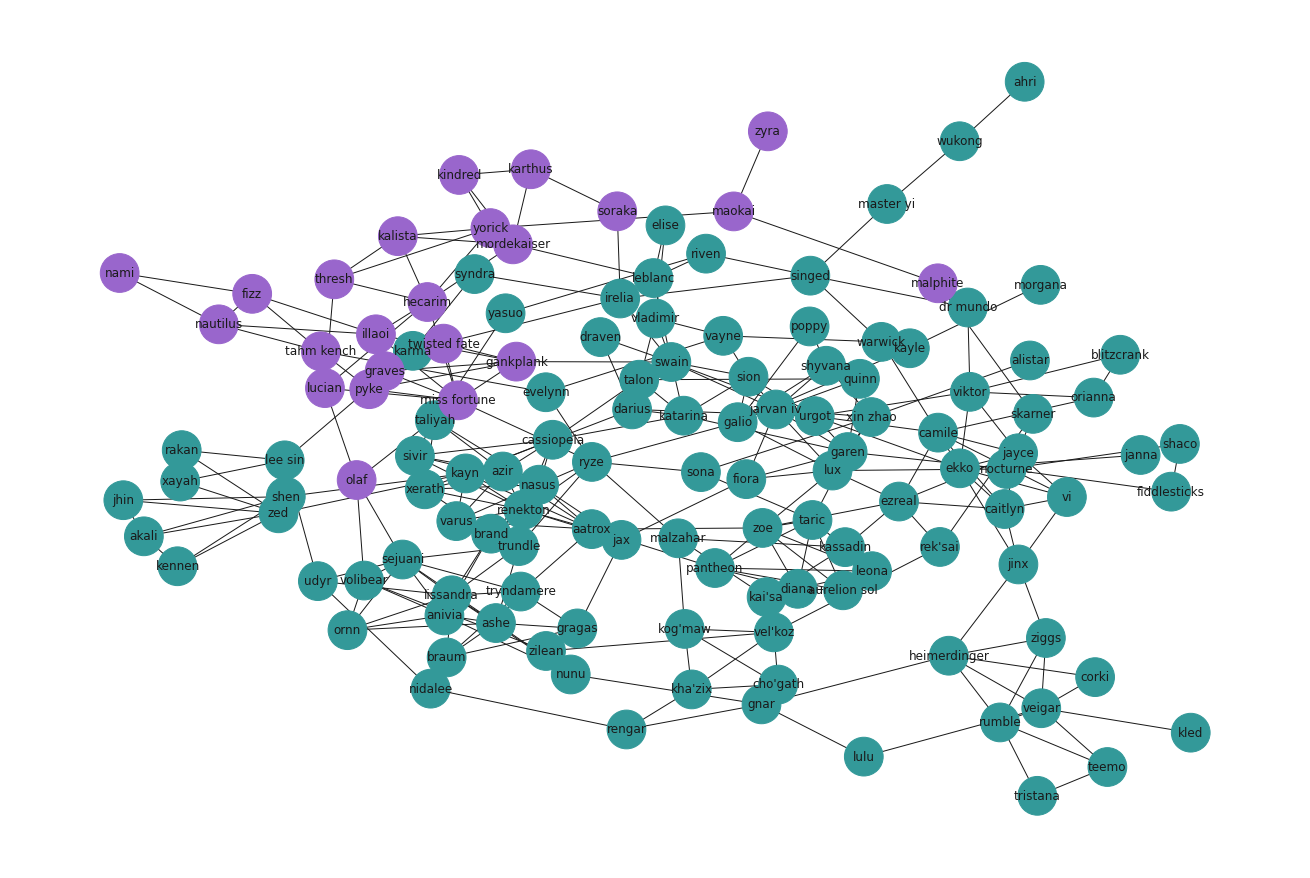

In [10]:
#Girvan And newman

def girvan_and_newman(G):
    plt.figure(figsize=(18,12))

    from networkx.algorithms.community.centrality import girvan_newman
    communities = girvan_newman(G)

    node_groups = []
    for com in next(communities):
        node_groups.append(list(com))

    color_map = []
    for node in G:
        if node in node_groups[0]:
            color_map.append('#339999')
        else: 
            color_map.append('#9966CC')  


    pos = nx.kamada_kawai_layout(G)
    nx.draw(G,pos = pos, node_size = 1500,node_color=color_map, with_labels=True)
    plt.show()

girvan_and_newman(G)